In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Fee function

In [2]:
def f(x, a, b, c):
    return a*x**2 + b*x + c

In [3]:
fees = [90, 360, 810, 1440, 2250, 3240, 4410, 5760, 7290, 9000]

In [4]:
popt, pcov = curve_fit(f, np.arange(1, 11), fees)

C:\Users\aeali\AppData\Local\Temp\ipykernel_8888\704369356.py:1: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(f, np.arange(1, 11), fees)


In [5]:
popt

array([ 9.00000000e+01, -1.89803728e-12, -3.10418358e-12])

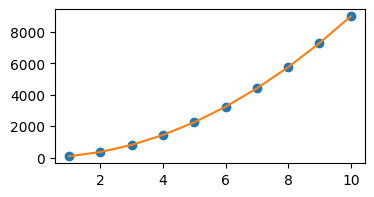

In [6]:
plt.figure(figsize=(4, 2))
plt.scatter(np.arange(1, 11), fees)
plt.plot(np.arange(1, 11), [90 * x ** 2 for x in np.arange(1, 11)], c='tab:orange')
plt.show()

# Optimal position size function

In [7]:
def calc_fee(pos_pct):
    return 90 * pos_pct ** 2

In [8]:
def calc_pnl(pos_pct, pos_change_pct, capital=750_000):
    fee = calc_fee(pos_pct)
    return pos_pct / 100 * capital * pos_change_pct / 100 - fee

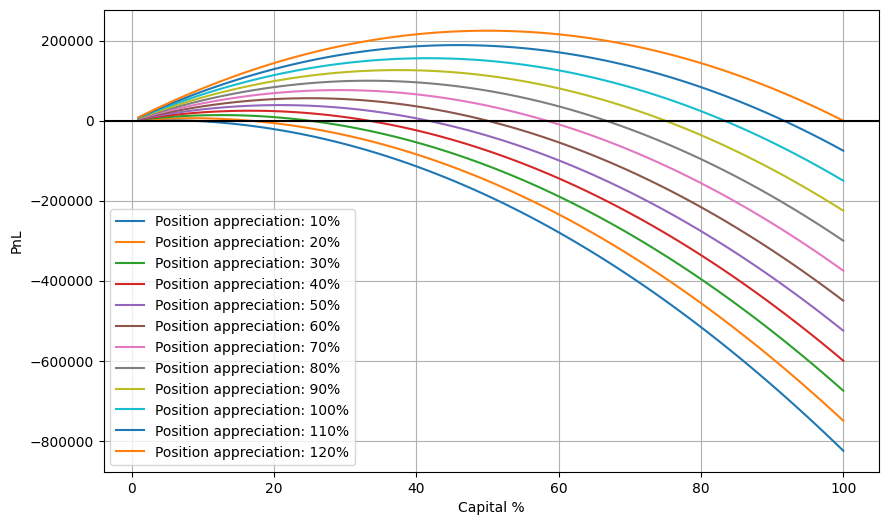

In [9]:
plt.figure(figsize=(10, 6))
for pct in np.arange(10, 121, 10):
    plt.plot(np.arange(1, 101), [calc_pnl(pos_pct=x, pos_change_pct=pct) for x in np.arange(1, 101)], label=f'Position appreciation: {pct}%')
plt.axhline(0, c='k')
plt.grid('on')
plt.xlabel('Capital %')
plt.ylabel('PnL')
plt.legend()
plt.show()

In [10]:
def opt_pos_pct(pos_change_pct):
    pnls = []
    for i in range(1, 101):
        pnls.append(calc_pnl(pos_pct=i, pos_change_pct=pos_change_pct))
    return np.argmax(pnls) + 1

In [11]:
for i in range(10, 121, 10):
    print(f'Position appreciation: {i}% --> Optimal capital percentage: {opt_pos_pct(i)}%')

Position appreciation: 10% --> Optimal capital percentage: 4%
Position appreciation: 20% --> Optimal capital percentage: 8%
Position appreciation: 30% --> Optimal capital percentage: 12%
Position appreciation: 40% --> Optimal capital percentage: 17%
Position appreciation: 50% --> Optimal capital percentage: 21%
Position appreciation: 60% --> Optimal capital percentage: 25%
Position appreciation: 70% --> Optimal capital percentage: 29%
Position appreciation: 80% --> Optimal capital percentage: 33%
Position appreciation: 90% --> Optimal capital percentage: 37%
Position appreciation: 100% --> Optimal capital percentage: 42%
Position appreciation: 110% --> Optimal capital percentage: 46%
Position appreciation: 120% --> Optimal capital percentage: 50%


# Portfolio

In [36]:
products = ['refrigerators', 'icicle_earrings', 'electric_blankets', 'sleds', 'ice_sculptures', 'ps6', 'moustache_serum', 'lava_lamps', 'hot_chocolate']

In [37]:
sentiment = {k: [] for k in products}
price_changes = {k: [] for k in products}
positions = {k: [] for k in products}
fees_paid = {k: [] for k in products}
pnls = {k: [] for k in products}
real_price_changes = {k: [] for k in products}

In [38]:
for k, v in zip(products, [5, 8, -9, -7, 6, 3, -10, 5, -7]):
    sentiment[k] = v

In [39]:
for k, v in zip(products, [12, 25, -40, -20, 15, 5, -100, 10, -15]):
    price_changes[k] = v

In [40]:
for k, v in price_changes.items():
    positions[k] = np.sign(v) * opt_pos_pct(np.abs(v))

In [41]:
positions

{'refrigerators': 5,
 'icicle_earrings': 10,
 'electric_blankets': -17,
 'sleds': -8,
 'ice_sculptures': 6,
 'ps6': 2,
 'moustache_serum': -42,
 'lava_lamps': 4,
 'hot_chocolate': -6}

In [42]:
np.sum(np.abs(list(positions.values())))

100

In [43]:
for k, v in zip(products, [2250, 9000, 26010, 5760, 3240, 360, 158759, 1440, 3240]):
    fees_paid[k] = v

In [44]:
for k, v in zip(products, [-1473, 275, 15922, 11217, 5596, 4283, 98202, -1438, -3221]):
    pnls[k] = v

In [63]:
for prod in products:
    real_price_changes[prod] = (pnls[prod] + fees_paid[prod]) / (positions[prod] / 100 * 750_000) * 100

In [64]:
real_price_changes

{'refrigerators': 2.072,
 'icicle_earrings': 12.366666666666665,
 'electric_blankets': -32.8878431372549,
 'sleds': -28.294999999999998,
 'ice_sculptures': 19.635555555555555,
 'ps6': 30.953333333333333,
 'moustache_serum': -81.57492063492063,
 'lava_lamps': 0.006666666666666667,
 'hot_chocolate': -0.042222222222222223}

In [56]:
price_changes

{'refrigerators': 12,
 'icicle_earrings': 25,
 'electric_blankets': -40,
 'sleds': -20,
 'ice_sculptures': 15,
 'ps6': 5,
 'moustache_serum': -100,
 'lava_lamps': 10,
 'hot_chocolate': -15}